In [1]:
%load_ext autoreload
%autoreload 2

In [180]:
import hwplatform as hw

In [181]:
port = hw.openSerialPort(auto_open=True, default_port="three")

In [182]:
print(f"Port is open: {port.is_open}")

Port is open: True


In [183]:
def readRegister(addr):
    port.writeln(f"r {addr}")
    result = int(port.readln())
    
    return result

def writeRegister(addr, value):
    port.writeln(f"w {addr} {value}")
    result = int(port.readln())
    return result == 0

In [184]:
writeRegister(1, 666)

True

In [185]:
readRegister(1)

666

In [186]:
machine = hw.RegisterMachine(readRegister, writeRegister)

In [187]:
machine.write(123, 333)
machine.read(1)

666

In [188]:
machine.writeBytes(5, 'hello'.encode('ascii'), auto_increment=True)
bytes(machine.readBytes(5, 5, auto_increment=True)).decode('ascii')

'hello'

In [189]:
hw.registerReader(machine)

In [190]:
hw.registerWriter(machine)

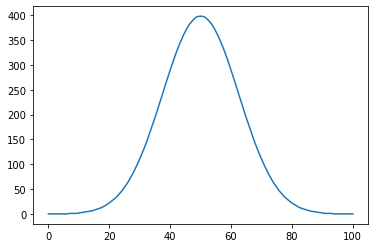

In [200]:
data = machine.readBytes(201, 100, auto_increment=True)
hw.plot(data)

In [201]:
hw.serialMonitor(port)

Button(description='Clear Log', style=ButtonStyle())

Output()